In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def setup_compact_jupyter():
    """Configure plotting for compact Jupyter output in VSCode"""
    # Very compact figure size
    plt.rcParams['figure.figsize'] = [4, 2.5]

    # Smaller font sizes
    plt.rcParams['font.size'] = 8
    plt.rcParams['axes.titlesize'] = 9
    plt.rcParams['axes.labelsize'] = 8
    plt.rcParams['xtick.labelsize'] = 7
    plt.rcParams['ytick.labelsize'] = 7
    plt.rcParams['legend.fontsize'] = 7

    # Adjust margins and spacing
    plt.rcParams['figure.constrained_layout.use'] = True
    plt.rcParams['figure.dpi'] = 80
    plt.rcParams['savefig.dpi'] = 150

    # Configure seaborn for compact display
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=0.7)

    # Pandas display options for compact output
    pd.set_option('display.max_rows', 20)
    pd.set_option('display.max_columns', 8)
    pd.set_option('display.precision', 3)

    # Numpy print options
    np.set_printoptions(precision=3, suppress=True, threshold=50)

# Run this at the start of your session
setup_compact_jupyter()

# Optional: Function to create even smaller plots when needed
def create_small_plot(width=3, height=2):
    """Create a figure with very small dimensions"""
    return plt.subplots(figsize=(width, height), dpi=80)

In [3]:
# Read the CSV file
df = pd.read_csv('all_clustering_results.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print("-----------------")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Display unique methods and datasets
print("\nUnique Methods:", df['Method'].unique())
print("Unique Datasets:", df['Dataset'].unique())

Dataset Overview:
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Dataset                                     25 non-null     object 
 1   Method                                      25 non-null     object 
 2   Success_Rate                                25 non-null     float64
 3   Final_Score                                 25 non-null     float64
 4   Rank                                        25 non-null     float64
 5   silhouette_mean                             25 non-null     float64
 6   silhouette_mean_penalized                   25 non-null     float64
 7   silhouette_percentile_75                    25 non-null     float64
 8   silhouette_percentile_75_penalized          25 non-null     float64
 9   silhouette_max                              25 non-nu

C:\Users\shiva\AppData\Local\Temp\ipykernel_18032\2294133233.py:20: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '#2c3e50'}` instead.

  bars = sns.barplot(
C:\Users\shiva\AppData\Local\Temp\ipykernel_18032\2294133233.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bars = sns.barplot(


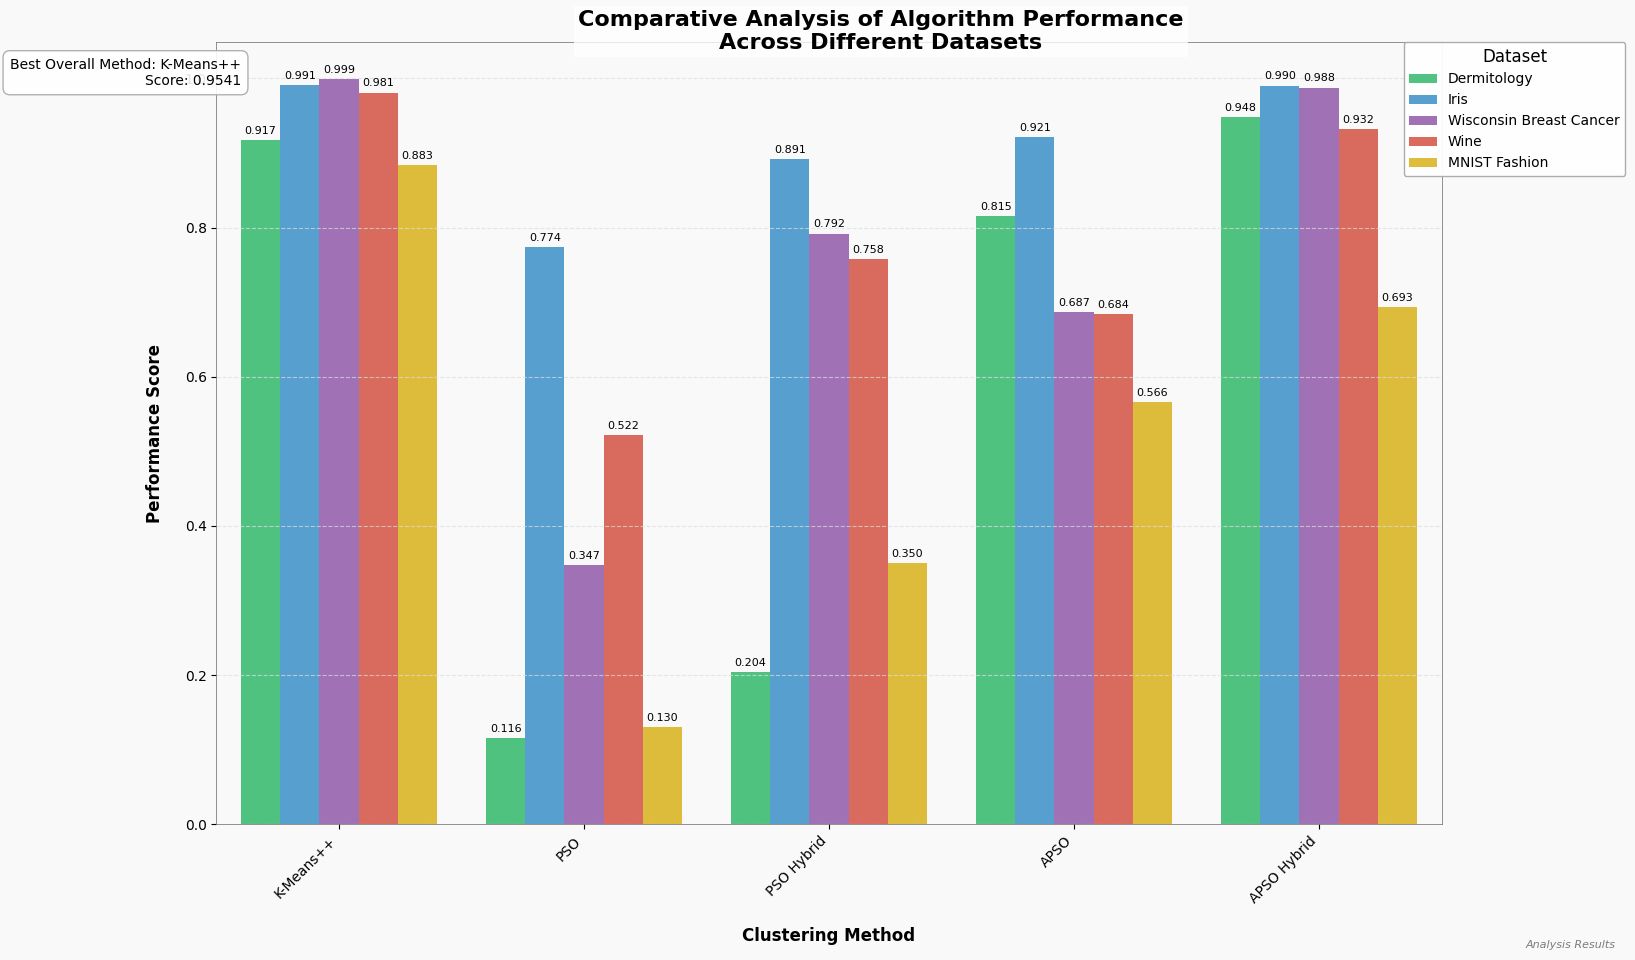


Detailed Performance Statistics:
             Mean Score  Std Dev  CV (%)
Method                                  
K-Means++         0.954    0.051    5.36
APSO Hybrid       0.910    0.124   13.61
APSO              0.735    0.137   18.58
PSO Hybrid        0.599    0.302   50.44
PSO               0.378    0.278   73.54

Performance Summary:
Best Method: K-Means++ (Score: 0.9541)
Performance Range: 0.3779 - 0.9541
Average Performance Across All Methods: 0.7152


In [4]:
# Enhanced Performance Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color configurations
plt.style.use('default')
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']
background_color = '#f9f9f9'
grid_color = '#dddddd'

# Create the figure with higher resolution and custom background
plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
ax.set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Create the enhanced bar plot
bars = sns.barplot(
    data=df,
    x='Method',
    y='Final_Score',
    hue='Dataset',
    palette=colors,
    saturation=0.8,
    errwidth=1,
    capsize=0.1,
    errcolor='#2c3e50',
    alpha=0.9
)

# Customize the plot
plt.title('Comparative Analysis of Algorithm Performance\nAcross Different Datasets',
          fontsize=16,
          pad=20,
          fontweight='bold',
          fontfamily='sans-serif')

plt.xlabel('Clustering Method', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Performance Score', fontsize=12, fontweight='bold', labelpad=15)

# Rotate x-axis labels and adjust their style
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid with custom style
plt.grid(axis='y', linestyle='--', alpha=0.7, color=grid_color)

# Customize the legend
plt.legend(title='Dataset',
          title_fontsize=12,
          fontsize=10,
          bbox_to_anchor=(1.15, 1),
          borderaxespad=0.,
          frameon=True,
          framealpha=0.95,
          edgecolor='darkgray',
          facecolor='white')

# Add value labels on the bars
def add_value_labels(ax):
    for container in ax.containers:
        ax.bar_label(container,
                    fmt='%.3f',
                    padding=3,
                    rotation=0,
                    fontsize=8)

add_value_labels(ax)

# Customize spines
for spine in ax.spines.values():
    spine.set_edgecolor('#666666')
    spine.set_linewidth(0.5)

# Add a subtle box around the plot
ax.set_frame_on(True)
plt.box(True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Optional: Add a background box for the title
title = ax.get_title()
ax.set_title('')
fig = plt.gcf()
fig.suptitle(title,
             fontsize=16,
             fontweight='bold',
             y=0.95,
             bbox=dict(facecolor='white',
                      edgecolor='none',
                      alpha=0.8,
                      pad=3.0))

# Display performance statistics
avg_performance = df.groupby('Method')['Final_Score'].agg(['mean', 'std']).round(4)
best_method = avg_performance['mean'].idxmax()
best_score = avg_performance.loc[best_method, 'mean']

# Add text box with summary statistics
stats_text = f'Best Overall Method: {best_method}\nScore: {best_score:.4f}'
plt.text(0.02, 0.98, stats_text,
         transform=ax.transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white',
                  edgecolor='darkgray',
                  alpha=0.9,
                  boxstyle='round,pad=0.5'))

# Add a subtle footer
plt.figtext(0.99, 0.01, 'Analysis Results',
            ha='right',
            va='bottom',
            fontsize=8,
            style='italic',
            alpha=0.5)

# Show the plot
plt.show()

# Print detailed statistics
print("\nDetailed Performance Statistics:")
print("================================")
stats_df = pd.DataFrame(avg_performance)
stats_df['cv'] = (stats_df['std'] / stats_df['mean'] * 100).round(2)
stats_df.columns = ['Mean Score', 'Std Dev', 'CV (%)']
stats_df = stats_df.sort_values('Mean Score', ascending=False)
print(stats_df.to_string())

# Additional summary statistics
print("\nPerformance Summary:")
print("===================")
print(f"Best Method: {best_method} (Score: {best_score:.4f})")
print(f"Performance Range: {stats_df['Mean Score'].min():.4f} - {stats_df['Mean Score'].max():.4f}")
print(f"Average Performance Across All Methods: {stats_df['Mean Score'].mean():.4f}")

C:\Users\shiva\AppData\Local\Temp\ipykernel_18032\199052316.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  height = success_stats['Success_Rate']['mean'][idx]


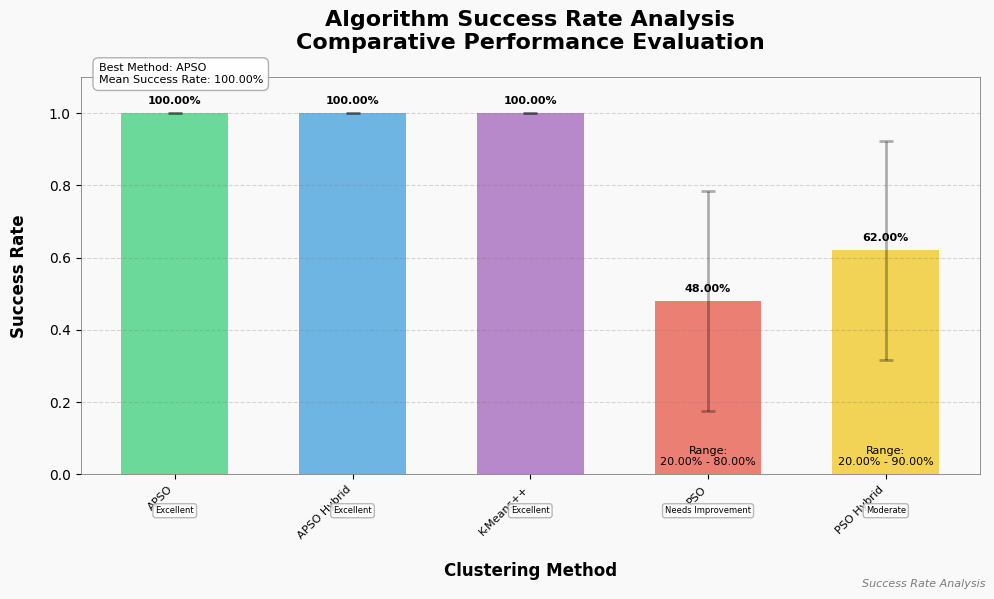


Detailed Success Rate Statistics:
             Mean Rate  Std Dev  Min Rate  Max Rate
Method                                             
APSO              1.00    0.000       1.0       1.0
APSO Hybrid       1.00    0.000       1.0       1.0
K-Means++         1.00    0.000       1.0       1.0
PSO               0.48    0.303       0.2       0.8
PSO Hybrid        0.62    0.303       0.2       0.9

Success Rate Categories:
APSO            | Rate: 100.00% | Category: Excellent
APSO Hybrid     | Rate: 100.00% | Category: Excellent
K-Means++       | Rate: 100.00% | Category: Excellent
PSO             | Rate: 48.00% | Category: Needs Improvement
PSO Hybrid      | Rate: 62.00% | Category: Moderate


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate success rate statistics
success_stats = df.groupby('Method').agg({
    'Success_Rate': ['mean', 'std', 'min', 'max']
}).round(4)

# Create figure with a higher resolution
plt.figure(figsize=(10, 6), dpi=100)
ax = plt.gca()

# Set style elements
background_color = '#f9f9f9'
bar_colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']
ax.set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)

# Create main bar plot with gradient colors
bars = plt.bar(range(len(success_stats)),
               success_stats['Success_Rate']['mean'],
               color=bar_colors,
               alpha=0.7,
               width=0.6)

# Add error bars
plt.errorbar(range(len(success_stats)),
            success_stats['Success_Rate']['mean'],
            yerr=success_stats['Success_Rate']['std'],
            fmt='none',
            color='black',
            capsize=5,
            capthick=2,
            elinewidth=2,
            alpha=0.3)

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.3, color='gray')

# Enhance plot appearance
plt.title('Algorithm Success Rate Analysis\nComparative Performance Evaluation',
         fontsize=16,
         pad=20,
         fontweight='bold')
plt.xlabel('Clustering Method', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Success Rate', fontsize=12, fontweight='bold', labelpad=15)

# Customize axis
plt.xticks(range(len(success_stats)),
           success_stats.index,
           rotation=45,
           ha='right',
           fontsize=8)
plt.ylim(0, 1.1)  # Set y-axis limit to 110% for better visualization

# Add value labels on top of bars
for idx, bar in enumerate(bars):
    height = success_stats['Success_Rate']['mean'][idx]
    plt.text(bar.get_x() + bar.get_width()/2.,
             height + 0.02,
             f'{height:.2%}',
             ha='center',
             va='bottom',
             fontsize=8,
             fontweight='bold')

# Add min-max range labels
for idx, (_, row) in enumerate(success_stats.iterrows()):
    min_val = row['Success_Rate']['min']
    max_val = row['Success_Rate']['max']
    if min_val != max_val:
        plt.text(idx, 0.02,
                f'Range:\n{min_val:.2%} - {max_val:.2%}',
                ha='center',
                va='bottom',
                fontsize=8)

# Add statistical information box
stats_text = (f"Best Method: {success_stats['Success_Rate']['mean'].idxmax()}\n"
             f"Mean Success Rate: {success_stats['Success_Rate']['mean'].max():.2%}")
plt.text(0.02, 0.98, stats_text,
         transform=ax.transAxes,
         fontsize=8,
         verticalalignment='bottom',
         bbox=dict(facecolor='white',
                  edgecolor='darkgray',
                  alpha=0.9,
                  boxstyle='round,pad=0.5'))

# Add success rate categories
def get_success_category(rate):
    if rate >= 0.9: return 'Excellent'
    elif rate >= 0.7: return 'Good'
    elif rate >= 0.5: return 'Moderate'
    else: return 'Needs Improvement'

for idx, rate in enumerate(success_stats['Success_Rate']['mean']):
    category = get_success_category(rate)
    plt.text(idx, -0.08,
             f'{category}',
             ha='center',
             va='top',
             transform=ax.get_xaxis_transform(),
             fontsize=6,
             bbox=dict(facecolor='white',
                      edgecolor='darkgray',
                      alpha=0.8,
                      boxstyle='round,pad=0.3'))

# Customize spines
for spine in ax.spines.values():
    spine.set_edgecolor('#666666')
    spine.set_linewidth(0.5)

# Add a subtle footer
plt.figtext(0.99, 0.01, 'Success Rate Analysis',
            ha='right',
            va='bottom',
            fontsize=8,
            style='italic',
            alpha=0.5)

# Adjust layout
plt.subplots_adjust(bottom=0.2)

# Show plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Success Rate Statistics:")
print("================================")
stats_df = success_stats.round(4)
stats_df.columns = ['Mean Rate', 'Std Dev', 'Min Rate', 'Max Rate']
print(stats_df.to_string())

# Print categorical analysis
print("\nSuccess Rate Categories:")
print("======================")
for method in success_stats.index:
    rate = success_stats.loc[method, ('Success_Rate', 'mean')]
    category = get_success_category(rate)
    print(f"{method:15} | Rate: {rate:6.2%} | Category: {category}")

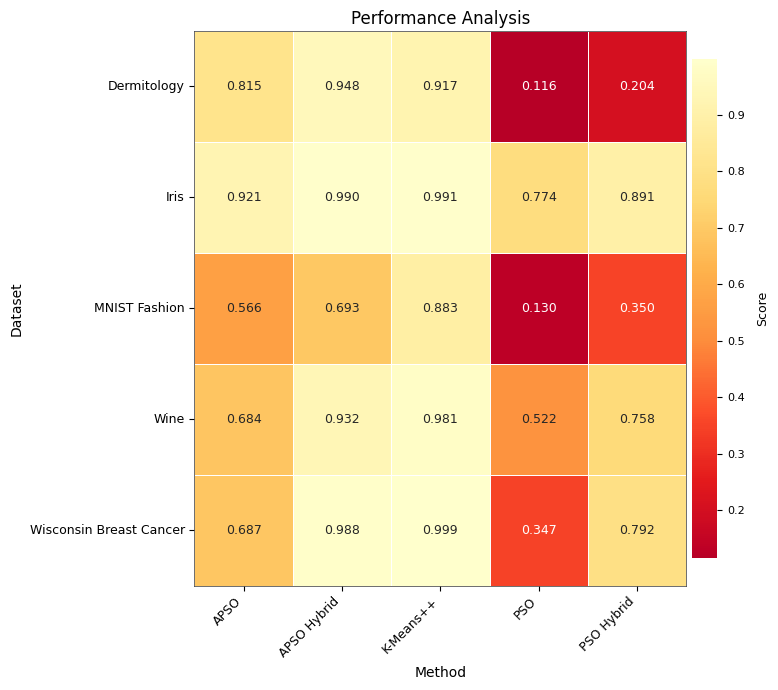


Best Method by Dataset:
                Dataset      Method  Final_Score
            Dermitology APSO Hybrid        0.948
                   Iris   K-Means++        0.991
          MNIST Fashion   K-Means++        0.883
                   Wine   K-Means++        0.981
Wisconsin Breast Cancer   K-Means++        0.999


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with smaller dimensions
plt.figure(figsize=(8, 7), dpi=100)

# Prepare the data
pivot_data = df.pivot(index='Dataset', columns='Method', values='Final_Score')

# Create the heatmap with tight styling
ax = sns.heatmap(pivot_data,
                 annot=True,
                 fmt='.3f',
                 cmap='YlOrRd_r',
                 center=0.5,
                 cbar_kws={'label': 'Score',
                          'orientation': 'vertical',
                          'pad': 0.01,
                          'shrink': 0.9},
                 square=False,  # Allow slight rectangle for better fit
                 linewidths=0.5,
                 linecolor='white',
                 annot_kws={'fontsize': 9,
                           'weight': 'normal'})

# Compact title
plt.title('Performance Analysis',
         fontsize=12,
         pad=5)

# Tight label styling
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Slim colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.set_label('Score', fontsize=9, labelpad=8)

# Minimal border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('#333333')

# Very tight layout
plt.tight_layout()

# Show plot
plt.show()

# Print concise statistics
print("\nBest Method by Dataset:")
best_methods = df.loc[df.groupby('Dataset')['Final_Score'].idxmax()][['Dataset', 'Method', 'Final_Score']]
print(best_methods.to_string(index=False))

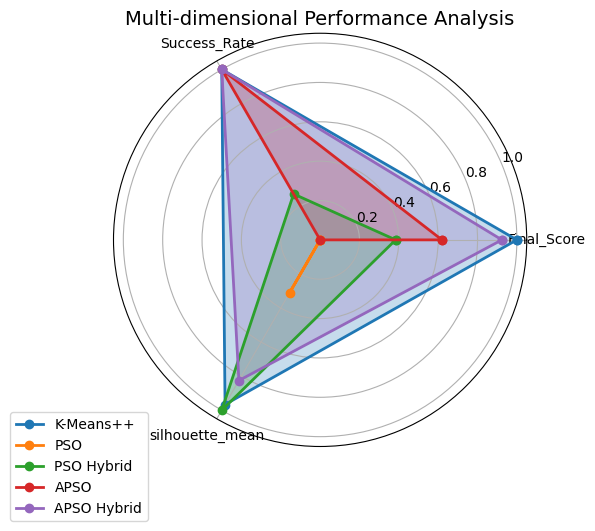

In [12]:
# Prepare data for radar plot
methods = df['Method'].unique()
metrics = ['Final_Score', 'Success_Rate', 'silhouette_mean']

radar_data = []
for method in methods:
    method_data = df[df['Method'] == method][metrics].mean()
    radar_data.append([method] + list(method_data))

radar_df = pd.DataFrame(radar_data, columns=['Method'] + metrics)

# Normalize the metrics
for metric in metrics:
    radar_df[metric] = (radar_df[metric] - radar_df[metric].min()) / (radar_df[metric].max() - radar_df[metric].min())

# Create radar plot
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(projection='polar'))
for idx, row in radar_df.iterrows():
    values = row[metrics].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Method'])
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title('Multi-dimensional Performance Analysis', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.show()